In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv('big_merge_s1.csv')
data[['retail_price','bl_sold_avgprice_used']].corr() #correlation matrix

C:\Users\A\AppData\Local\Temp\ipykernel_21888\92546534.py:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('big_merge_s1.csv')


,retail_price,bl_sold_avgprice_used
retail_price,1.000000,0.690097
bl_sold_avgprice_used,0.690097,1.000000


<Axes: xlabel='retail_price', ylabel='bl_sold_avgprice_used'>

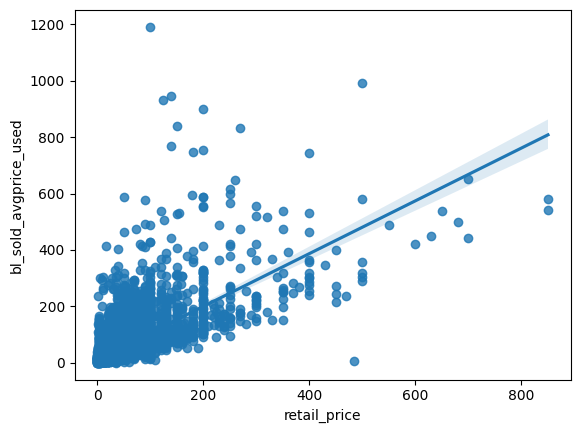

In [3]:
sns.regplot(data, x = 'retail_price', y = 'bl_sold_avgprice_used')

<Axes: xlabel='retail_price', ylabel='bl_sold_avgprice_used'>

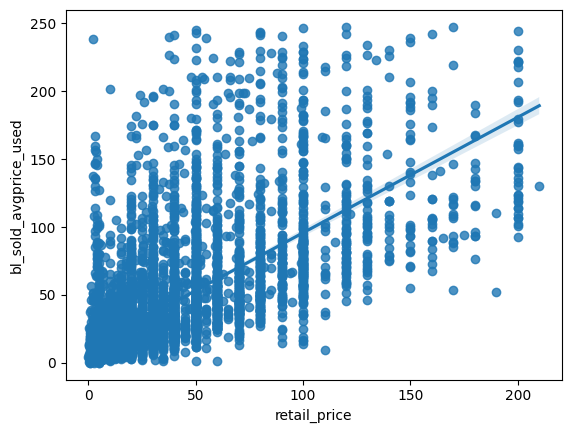

In [4]:
# Identify outliers with a z-score greater than 3
threshold = 3
data_wo_outliers = data[data['retail_price'].notnull() & data['bl_sold_avgprice_used'].notnull()]
data_wo_outliers = data_wo_outliers[np.abs(stats.zscore(data_wo_outliers['retail_price'])) < threshold]
data_wo_outliers = data_wo_outliers[np.abs(stats.zscore(data_wo_outliers['bl_sold_avgprice_used'])) < threshold]
sns.regplot(data_wo_outliers, x = 'retail_price', y = 'bl_sold_avgprice_used')

In [5]:
data_wo_outliers[['retail_price','bl_sold_avgprice_used']].corr() #the correlation is lower for the data without outliers

,retail_price,bl_sold_avgprice_used
retail_price,1.000000,0.676298
bl_sold_avgprice_used,0.676298,1.000000


In [6]:
# trying to find the most significant factors influencing the sales price of used sets on Bricklink
formula = 'bl_sold_avgprice_used ~ Num_Instructions + Owned + Rating + year + agerange_min + num_pieces + minifigures + retail_price + bs_wanted + bl_sold_qty_new + bl_sold_qty_used + bl_offer_qty_new + bl_offer_qty_used'
mod = smf.ols(formula, data)
res = mod.fit()
res.summary() # R-squared is fairly low and the data are not normally distributed which I know from the Omnibus and Jarque-Bera (JB) values - I cannot use the coefficient p-values to evaluate their statistical significance

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     bl_sold_avgprice_used   R-squared:                       0.678
Model:                               OLS   Adj. R-squared:                  0.677
Method:                    Least Squares   F-statistic:                     391.1
Date:                   Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                           22:10:47   Log-Likelihood:                -11750.
No. Observations:                   2237   AIC:                         2.353e+04
Df Residuals:                       2224   BIC:                         2.360e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7691.3750    518.502     14.834      0.000    6674.576    8708.174
Num_Instructions     -4.0736      0.475     -8.580      0.000      -5.005      -3.143
Owned                 0.0011      0.000      2.628      0.009       0.000       0.002
Rating               28.2858      3.893      7.265      0.000      20.651      35.921
year                 -3.8693      0.257    -15.050      0.000      -4.374      -3.365
agerange_min          2.6878      0.656      4.097      0.000       1.401       3.974
num_pieces            0.0409      0.006      6.772      0.000       0.029       0.053
minifigures           0.7145      0.449      1.590      0.112      -0.167       1.596
retail_price          0.5571      0.058      9.599      0.000       0.443       0.671
bs_wanted         -2.819e-10    1.9e-11    -14.834      0.000   -3.19e-10   -2.45e-10
bl_sold_qty_new       0.0290      0.022      1.350      0.177      -0.013       0.071
bl_sold_qty_used      0.1783      0.131      1.362      0.173      -0.078       0.435
bl_offer_qty_new     -0.0186      0.004     -4.426      0.000      -0.027      -0.010
bl_offer_qty_used    -0.3820      0.050     -7.700      0.000      -0.479      -0.285
==============================================================================
Omnibus:                     2015.965   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           135722.211
Skew:                           3.971   Prob(JB):                         0.00
Kurtosis:                      40.323   Cond. No.                     4.63e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [7]:
# getting rid of variables with low impact on R-squared
formula = 'bl_sold_avgprice_used ~ Num_Instructions + Rating + year + agerange_min + num_pieces + minifigures + retail_price + bl_sold_qty_used + bl_offer_qty_used'
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     bl_sold_avgprice_used   R-squared:                       0.672
Model:                               OLS   Adj. R-squared:                  0.671
Method:                    Least Squares   F-statistic:                     534.1
Date:                   Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                           22:10:47   Log-Likelihood:                -12368.
No. Observations:                   2357   AIC:                         2.476e+04
Df Residuals:                       2347   BIC:                         2.481e+04
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7354.2784    450.351     16.330      0.000    6471.151    8237.406
Num_Instructions     -3.9627      0.466     -8.506      0.000      -4.876      -3.049
Rating               28.3807      3.727      7.616      0.000      21.073      35.689
year                 -3.7020      0.223    -16.580      0.000      -4.140      -3.264
agerange_min          2.4036      0.630      3.816      0.000       1.168       3.639
num_pieces            0.0416      0.006      7.019      0.000       0.030       0.053
minifigures           0.7489      0.438      1.708      0.088      -0.111       1.609
retail_price          0.5590      0.057      9.853      0.000       0.448       0.670
bl_sold_qty_used      0.3735      0.099      3.777      0.000       0.180       0.567
bl_offer_qty_used    -0.3164      0.044     -7.176      0.000      -0.403      -0.230
==============================================================================
Omnibus:                     2107.358   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           142803.920
Skew:                           3.923   Prob(JB):                         0.00
Kurtosis:                      40.317   Cond. No.                     9.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 40 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Packaging                              14936 non-null  object 
 1   Num_Instructions                       14936 non-null  float64
 2   Availability                           14936 non-null  object 
 3   Owned                                  14771 non-null  float64
 4   Rating                                 7038 non-null   float64
 5   set_id                                 25201 non-null  object 
 6   name                                   25201 non-null  object 
 7   year                                   25201 non-null  float64
 8   agerange_min                           6787 non-null   float64
 9   bricksetURL                            18457 non-null  object 
 10  thumbnailURL                           17451 non-null  object 
 11  nu

In [9]:
# adding category data
formula = 'bl_sold_avgprice_used ~ Num_Instructions + Rating + year + agerange_min + minifigures + num_pieces + retail_price + bl_sold_qty_used + bl_offer_qty_used + C(Availability) + C(set_theme) + C(set_subtheme) + C(r_main_theme)'
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     bl_sold_avgprice_used   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.805
Method:                    Least Squares   F-statistic:                     23.37
Date:                   Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                           22:10:56   Log-Likelihood:                -9870.5
No. Observations:                   2019   AIC:                         2.049e+04
Df Residuals:                       1645   BIC:                         2.259e+04
Df Model:                            373                                         
Covariance Type:               nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       7541.1522    605.708     12.450      0.000    6353.112    8729.192
C(Availability)[T.LEGO exclusive]                               1239.2798     95.892     12.924      0.000    1051.196    1427.364
C(Availability)[T.LEGOLAND exclusive]                            395.3353     32.828     12.043      0.000     330.946     459.725
C(Availability)[T.Not sold]                                     1223.5206    104.959     11.657      0.000    1017.653    1429.388
C(Availability)[T.Promotional]                                  1156.0258     95.592     12.093      0.000     968.530    1343.521
C(Availability)[T.Promotional (Airline)]                        1.716e-08   1.39e-09     12.312      0.000    1.44e-08    1.99e-08
C(Availability)[T.Retail]                                       1178.5258     96.584     12.202      0.000     989.086    1367.965
C(Availability)[T.Retail - limited]                             1175.2495     96.009     12.241      0.000     986.938    1363.562
C(Availability)[T.Unknown]                                      8.692e-10    1.2e-10      7.219      0.000    6.33e-10    1.11e-09
C(Availability)[T.{Not specified}]                              1173.2154     96.063     12.213      0.000     984.797    1361.633
C(set_theme)[T.Action Wheelers]                                 1.169e-08   1.18e-09      9.900      0.000    9.37e-09     1.4e-08
C(set_theme)[T.Advanced models]                                  314.2939     17.388     18.075      0.000     280.189     348.399
C(set_theme)[T.Adventurers]                                      104.4731     12.932      8.078      0.000      79.107     129.839
C(set_theme)[T.Agents]                                            84.2438      9.317      9.042      0.000      65.970     102.518
C(set_theme)[T.Alpha Team]                                      6.885e-10   1.43e-10      4.800      0.000    4.07e-10     9.7e-10
C(set_theme)[T.Animal Crossing]                                -4.462e-08   3.73e-09    -11.964      0.000   -5.19e-08   -3.73e-08
C(set_theme)[T.Aqua Raiders]                                     1.54e-09    1.3e-10     11.838      0.000    1.29e-09     1.8e-09
C(set_theme)[T.Aquazone]                                         107.0314     27.171      3.939      0.000      53.738     160.325
C(set_theme)[T.Architecture]                                    1.465e-08   1.27e-09     11.548      0.000    1.22e-08    1.71e-08
C(set_theme)[T.Art]                                             6.916e-08   5.66e-09     12.227      0.000    5.81e-08    8.03e-08
C(set_theme)[T.Assorted]             

In [10]:
# getting rid of variables with low impact on R-squared
formula = 'bl_sold_avgprice_used ~ Rating + year + agerange_min + minifigures + retail_price + bl_offer_qty_used + C(Availability) + C(set_theme) + C(set_subtheme) + C(r_main_theme)'
mod = smf.ols(formula, data)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     bl_sold_avgprice_used   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.803
Method:                    Least Squares   F-statistic:                     23.18
Date:                   Sat, 01 Jun 2024   Prob (F-statistic):               0.00
Time:                           22:11:07   Log-Likelihood:                -9885.8
No. Observations:                   2019   AIC:                         2.051e+04
Df Residuals:                       1648   BIC:                         2.260e+04
Df Model:                            370                                         
Covariance Type:               nonrobust                                         
==================================================================================================================================
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       7637.8535    607.036     12.582      0.000    6447.211    8828.496
C(Availability)[T.LEGO exclusive]                               1256.1532     96.071     13.075      0.000    1067.720    1444.587
C(Availability)[T.LEGOLAND exclusive]                            400.0631     32.935     12.147      0.000     335.464     464.662
C(Availability)[T.Not sold]                                     1240.2865    105.253     11.784      0.000    1033.843    1446.730
C(Availability)[T.Promotional]                                  1172.8466     95.791     12.244      0.000     984.962    1360.731
C(Availability)[T.Promotional (Airline)]                        7.645e-10   2.99e-10      2.559      0.011    1.78e-10    1.35e-09
C(Availability)[T.Retail]                                       1192.5073     96.820     12.317      0.000    1002.605    1382.410
C(Availability)[T.Retail - limited]                             1190.2009     96.244     12.366      0.000    1001.427    1378.975
C(Availability)[T.Unknown]                                      3.263e-08    2.6e-09     12.556      0.000    2.75e-08    3.77e-08
C(Availability)[T.{Not specified}]                              1185.7959     96.264     12.318      0.000     996.983    1374.608
C(set_theme)[T.Action Wheelers]                                 2.664e-08   2.15e-09     12.403      0.000    2.24e-08    3.09e-08
C(set_theme)[T.Advanced models]                                  320.0638     17.360     18.437      0.000     286.014     354.114
C(set_theme)[T.Adventurers]                                      107.9038     12.968      8.321      0.000      82.469     133.338
C(set_theme)[T.Agents]                                            86.8296      9.328      9.309      0.000      68.534     105.125
C(set_theme)[T.Alpha Team]                                     -1.937e-08   1.56e-09    -12.403      0.000   -2.24e-08   -1.63e-08
C(set_theme)[T.Animal Crossing]                                 9.954e-08   7.95e-09     12.514      0.000    8.39e-08    1.15e-07
C(set_theme)[T.Aqua Raiders]                                    2.378e-08   1.97e-09     12.067      0.000    1.99e-08    2.77e-08
C(set_theme)[T.Aquazone]                                         107.8687     27.329      3.947      0.000      54.265     161.472
C(set_theme)[T.Architecture]                                   -6.059e-08   4.86e-09    -12.470      0.000   -7.01e-08   -5.11e-08
C(set_theme)[T.Art]                                            -8.423e-09   6.74e-10    -12.502      0.000   -9.74e-09    -7.1e-09
C(set_theme)[T.Assorted]             

In [11]:
# Identify outliers with a z-score greater than 3 - I want to mark positive outliers with +1 and negative outliers with -1 for further analyses and visualizations
threshold = 3
data_current_price = data[data['bl_sold_avgprice_used'].notnull()]
data_current_price = data_current_price[['set_id','bl_sold_avgprice_used']]
outliers_1 = data_current_price[stats.zscore(data_current_price['bl_sold_avgprice_used']) > threshold]
outliers_1['outlier_bl_sold_avgprice_used'] = 1
outliers_n1 = data_current_price[stats.zscore(data_current_price['bl_sold_avgprice_used']) < -threshold]
outliers_n1['outlier_bl_sold_avgprice_used'] = -1
outliers_n1.info() # no negative outliers found

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   set_id                         0 non-null      object 
 1   bl_sold_avgprice_used          0 non-null      float64
 2   outlier_bl_sold_avgprice_used  0 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 0.0+ bytes


C:\Users\A\AppData\Local\Temp\ipykernel_21888\1363471377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_1['outlier_bl_sold_avgprice_used'] = 1


In [12]:
data = pd.merge(data,outliers_1[['set_id','outlier_bl_sold_avgprice_used']],how='left',on='set_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Packaging                              14936 non-null  object 
 1   Num_Instructions                       14936 non-null  float64
 2   Availability                           14936 non-null  object 
 3   Owned                                  14771 non-null  float64
 4   Rating                                 7038 non-null   float64
 5   set_id                                 25201 non-null  object 
 6   name                                   25201 non-null  object 
 7   year                                   25201 non-null  float64
 8   agerange_min                           6787 non-null   float64
 9   bricksetURL                            18457 non-null  object 
 10  thumbnailURL                           17451 non-null  object 
 11  nu

In [13]:
# Identify outliers with a z-score greater than 3 in percent price increases
threshold = 3
data_current_price = data[data['bl_percent_price_increase_used'].notnull()]
data_current_price = data_current_price[['set_id','bl_percent_price_increase_used']]
outliers_1 = data_current_price[stats.zscore(data_current_price['bl_percent_price_increase_used']) > threshold]
outliers_n1 = data_current_price[stats.zscore(data_current_price['bl_percent_price_increase_used']) < -threshold]
outliers_n1.info() # no negative outliers found

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   set_id                          0 non-null      object 
 1   bl_percent_price_increase_used  0 non-null      float64
dtypes: float64(1), object(1)
memory usage: 0.0+ bytes


In [14]:
outliers_1['outlier_bl_percent_price_increase_used'] = 1
data = pd.merge(data,outliers_1[['set_id','outlier_bl_percent_price_increase_used']],how='left',on='set_id')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 42 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Packaging                               14936 non-null  object 
 1   Num_Instructions                        14936 non-null  float64
 2   Availability                            14936 non-null  object 
 3   Owned                                   14771 non-null  float64
 4   Rating                                  7038 non-null   float64
 5   set_id                                  25201 non-null  object 
 6   name                                    25201 non-null  object 
 7   year                                    25201 non-null  float64
 8   agerange_min                            6787 non-null   float64
 9   bricksetURL                             18457 non-null  object 
 10  thumbnailURL                            17451 non-null  ob

C:\Users\A\AppData\Local\Temp\ipykernel_21888\2129410211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_1['outlier_bl_percent_price_increase_used'] = 1


In [15]:
# Identify outliers with a z-score greater than 3 in absolute price increases
threshold = 3
data_current_price = data[data['bl_price_increase_used'].notnull()]
data_current_price = data_current_price[['set_id','bl_price_increase_used']]
outliers_1 = data_current_price[stats.zscore(data_current_price['bl_price_increase_used']) > threshold]
outliers_n1 = data_current_price[stats.zscore(data_current_price['bl_price_increase_used']) < -threshold]
outliers_n1.info() # 16 negative outliers found

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 11928 to 25014
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   set_id                  16 non-null     object 
 1   bl_price_increase_used  16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


In [16]:
outliers_1['outlier_bl_price_increase_used'] = 1
outliers_n1['outlier_bl_price_increase_used'] = -1
outliers = pd.merge(outliers_1[['set_id','outlier_bl_price_increase_used']],outliers_n1[['set_id','outlier_bl_price_increase_used']],how='outer',on='set_id')
outliers['outlier_bl_price_increase_used']=outliers[['outlier_bl_price_increase_used_x','outlier_bl_price_increase_used_y']].bfill(axis=1).iloc[:, 0]
outliers.drop(columns = ['outlier_bl_price_increase_used_x','outlier_bl_price_increase_used_y'],inplace = True)
data = pd.merge(data,outliers[['set_id','outlier_bl_price_increase_used']],how='left',on='set_id')
data.info()

C:\Users\A\AppData\Local\Temp\ipykernel_21888\2098345420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_1['outlier_bl_price_increase_used'] = 1
C:\Users\A\AppData\Local\Temp\ipykernel_21888\2098345420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_n1['outlier_bl_price_increase_used'] = -1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25201 entries, 0 to 25200
Data columns (total 43 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Packaging                               14936 non-null  object 
 1   Num_Instructions                        14936 non-null  float64
 2   Availability                            14936 non-null  object 
 3   Owned                                   14771 non-null  float64
 4   Rating                                  7038 non-null   float64
 5   set_id                                  25201 non-null  object 
 6   name                                    25201 non-null  object 
 7   year                                    25201 non-null  float64
 8   agerange_min                            6787 non-null   float64
 9   bricksetURL                             18457 non-null  object 
 10  thumbnailURL                            17451 non-null  ob

In [17]:
data.to_csv('big_merge_s2.csv',index = False)